HW1

1 - Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# read data into dataframe
MOVIELENS_DIR = "C:\\Users\\nogahm\\PycharmProjects\\HW_Recsys\\ml-100k"
RATING_DATA_FILE = "\\u.data"
# RATING_DATA_GEN_FILE = 'u_gen.data'
# RATINGS_CSV_FILE = 'u_emb.data'
# RATINGS_CSV_FILE_NORM = 'u_norm.data'
# RATINGS_GEN_CSV_FILE = 'u_genr.data'
# MODEL_WEIGHTS_FILE = 'u_emb_weights.h5'
# MODEL_WEIGHTS_FILE_CORE = 'u_emb_weights'
ratings = pd.read_csv(MOVIELENS_DIR+RATING_DATA_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

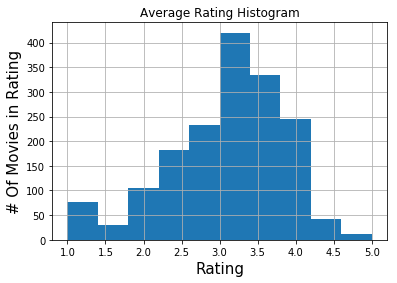

In [38]:
# get average rating for each movie and print histogram
average_rating=ratings.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating.sort_values('rating', inplace=True, ascending=False)
fig = average_rating.hist(column="rating")
plt.title("Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)

In [39]:
# print top 3 movies
average_rating.head(3)

,rating
movieid,
814,5.0
1599,5.0
1201,5.0


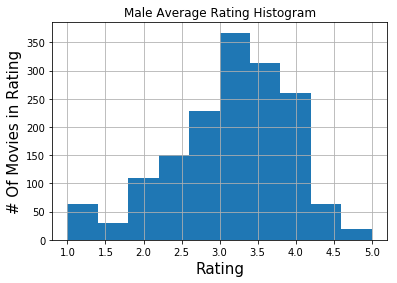

Top 3 movies by males:


,rating
movieid,
1500,5.0
1201,5.0
1605,5.0


In [60]:
# add column gender to ratings
USERS_DATA_FILE = "\\u.user"
users = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'age' , 'gender' , 'occupation' , 'zip code'])
merged_users_movies=pd.merge(ratings,users)

#Male Analysis
rating_male=merged_users_movies.loc[merged_users_movies['gender'] == 'M']
average_rating_male = rating_male.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_male.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_male.hist(column="rating")
plt.title("Male Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by males:")
average_rating_male.head(3)


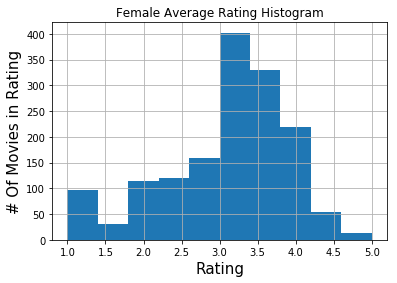

Top 3 movies by females:


,rating
movieid,
1368,5.0
1451,5.0
1594,5.0


In [75]:

#Female Analysis
rating_female=merged_users_movies.loc[merged_users_movies['gender'] == 'F']
average_rating_female = rating_female.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_female.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_female.hist(column="rating")
plt.title("Female Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by females:")
average_rating_female.head(3)

In [112]:
# TODO
# get average difference between genders
average_rating_male.rename(columns = {'rating':'male_rating'}, inplace = True)
average_rating_female.rename(columns = {'rating':'female_rating'}, inplace = True)
merged_users_averages=pd.merge(average_rating_male,average_rating_female,left_index=True,right_index=True,how='outer')
# remove NAN
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['female_rating'])]
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['male_rating'])]
# get difference
difference_between_genders=merged_users_averages.apply(lambda row: (row['male_rating']-row['female_rating']), axis=1)
print(difference_between_genders)
# type(difference_between_genders)

movieid
1       0.119994
2      -0.189850
3       0.420608
4       0.191463
5      -0.632102
6      -0.028571
7       0.300315
8      -0.075157
9      -0.043452
10      0.169565
11      0.095268
12      0.065728
13      0.208042
14      0.109091
15     -0.244160
16     -0.056452
17      0.318403
18      1.000000
19     -0.554007
20     -0.250000
21     -0.568915
22      0.031136
23     -0.061303
24      0.236301
25     -0.324113
26      0.343699
27      0.267857
28     -0.090047
29     -0.635452
30      0.285714
          ...   
1558    3.000000
1560    2.500000
1573    3.000000
1589    2.000000
1591    2.600000
1592    3.250000
1594   -1.000000
1598    0.600000
1600    0.333333
1602    1.000000
1605    2.666667
1607    0.500000
1608   -1.000000
1609    1.000000
1610    1.500000
1611    0.000000
1612    2.500000
1615   -0.952381
1620   -0.666667
1623    0.000000
1628    0.500000
1631   -1.000000
1639    0.500000
1643    0.500000
1646    1.000000
1652    2.000000
1656    3.000000
1658  